# SIMPLE NEURAL NETWORK
* Will be using the UC Irvine Iris Dataset
* Data can be obtained from https://gist.github.com/curran/a08a1080b88344b0c8a7

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
    # Input layer (4 heatures of the flower) --> 
    # Hidden Layer1 (number of neurons) -->
    # H2 (n) -->
    # output (3 classes of Iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() # Instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
torch.manual_seed(41)

In [4]:
# Create an instance of Model
model = Model()

## Read in Data

In [5]:
# Set working directory equal to location of current notebook file
os.getcwd()
working_directory = os.path.dirname(os.path.abspath(__vsc_ipynb_file__))
os.chdir(working_directory)
os.getcwd()

'/home/rory/Dev/AIML/practice/deep-learning-with-pytorch'

In [6]:
# Read in file
filename = 'iris.csv'
url = rf'./input/{filename}'
my_df = pd.read_csv(url)

In [7]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
# Encode last column from string to floats
my_df['species'] = my_df['species'].replace('setosa', float(0.0))
my_df['species'] = my_df['species'].replace('versicolor', float(1.0))
my_df['species'] = my_df['species'].replace('virginica', float(2.0))

/tmp/ipykernel_10720/3184779186.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', float(2.0))


In [10]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [12]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [13]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [14]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [15]:
# Convert y features to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
# Set the criterion of our model to measure our error (how far off predictions are from actuals)
criterion = nn.CrossEntropyLoss()
# Choose the Adam optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
# Train our model
# Epochs? (one run thru all training data in our network)
epochs = 100
losses = []
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the loss/error, gonna be high at first
    loss = criterion(y_pred, y_train) # Predicted vs actuals

    # Keep track of our losses
    losses.append(loss.detach().numpy())

    # Print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
    
    # Do some back propagation: Take the error rate of forward propagation and feed it back
    # thru the network to fine-tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epochs')

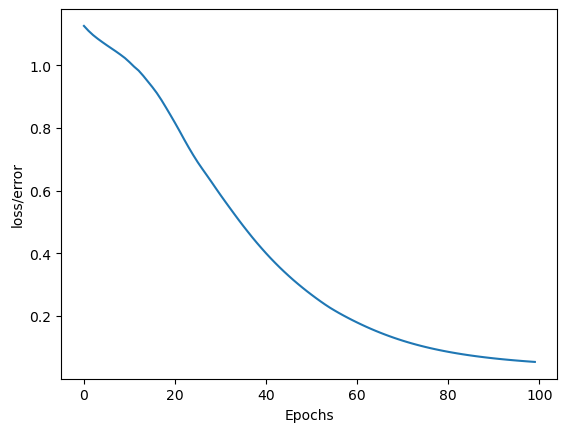

In [18]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")

In [19]:
# Evaluate Model on Test Dataset (validate model on test set)
with torch.no_grad(): # Turn off back propagation since we aren't learning
    y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be our predictions
    loss = criterion(y_eval, y_test) # Find the loss or error

In [20]:
loss

tensor(0.1315)

In [21]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        if y_test[i] == 0:
            val = "Setosa"
        elif y_test[i] == 1:
            val = 'Versicolor'
        else:
            val = 'Virginica'
        
        if y_val.argmax().item() == 0:
            pred = "Setosa"
        elif y_val.argmax().item() == 1:
            pred = 'Versicolor'
        else:
            pred = 'Virginica'

        #print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        print(f'{i+1}.) {str(y_val)} \t {val} \t {pred}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 Virginica 	 Virginica
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 Virginica 	 Virginica
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 Virginica 	 Virginica
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 Versicolor 	 Versicolor
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 Virginica 	 Virginica
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 Versicolor 	 Versicolor
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 Virginica 	 Virginica
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 Versicolor 	 Versicolor
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 Virginica 	 Virginica
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 Virginica 	 Virginica
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 Virginica 	 Virginica
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 Setosa 	 Setosa
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 Setosa 	 Setosa
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 Versicolor 	 Versicolor
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 Setosa 	 Setosa
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 V